In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test.shape

(367, 12)

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [8]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


In [9]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

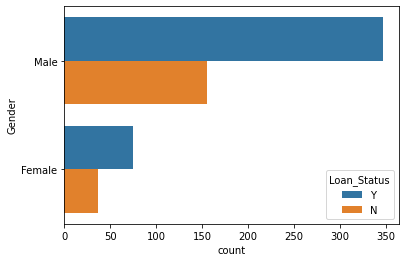

In [10]:
sns.countplot(y='Gender',hue='Loan_Status',data=df_train)

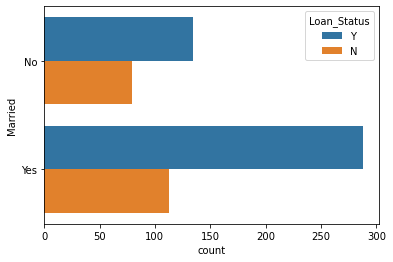

In [11]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

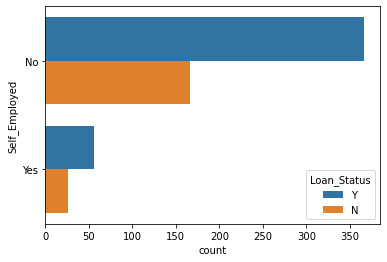

In [12]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df_train)

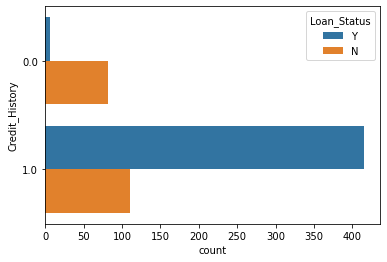

In [13]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df_train)

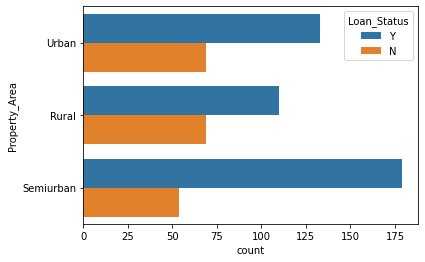

In [14]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df_train)

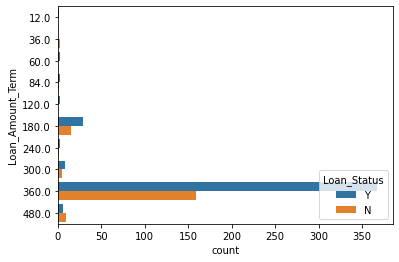

In [15]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

c:\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


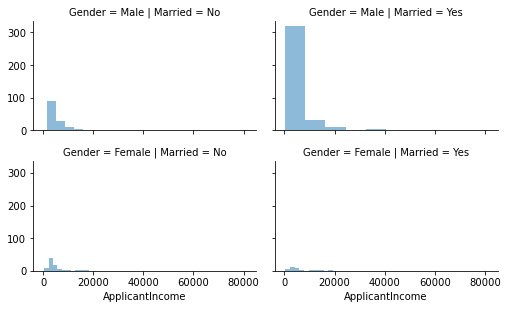

In [16]:
grid=sns.FacetGrid(df_train,row='Gender',col='Married',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

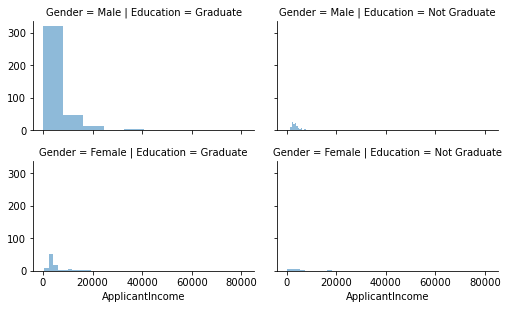

In [17]:
grid=sns.FacetGrid(df_train,row='Gender',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

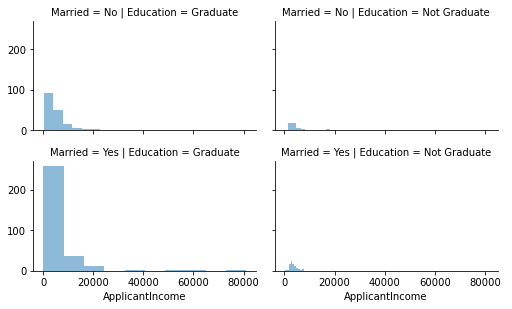

In [18]:
grid=sns.FacetGrid(df_train,row='Married',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

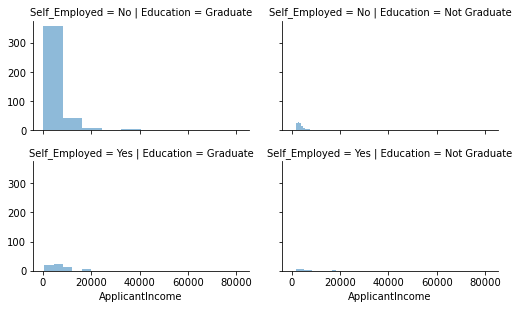

In [19]:
grid=sns.FacetGrid(df_train,row='Self_Employed',col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

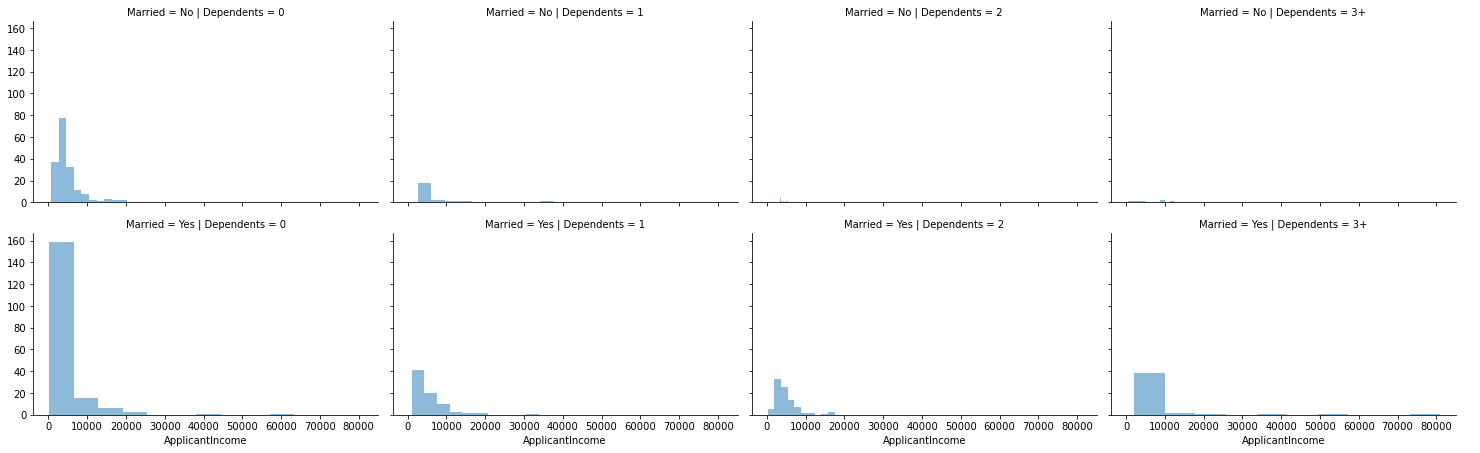

In [20]:
grid=sns.FacetGrid(df_train,row='Married',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

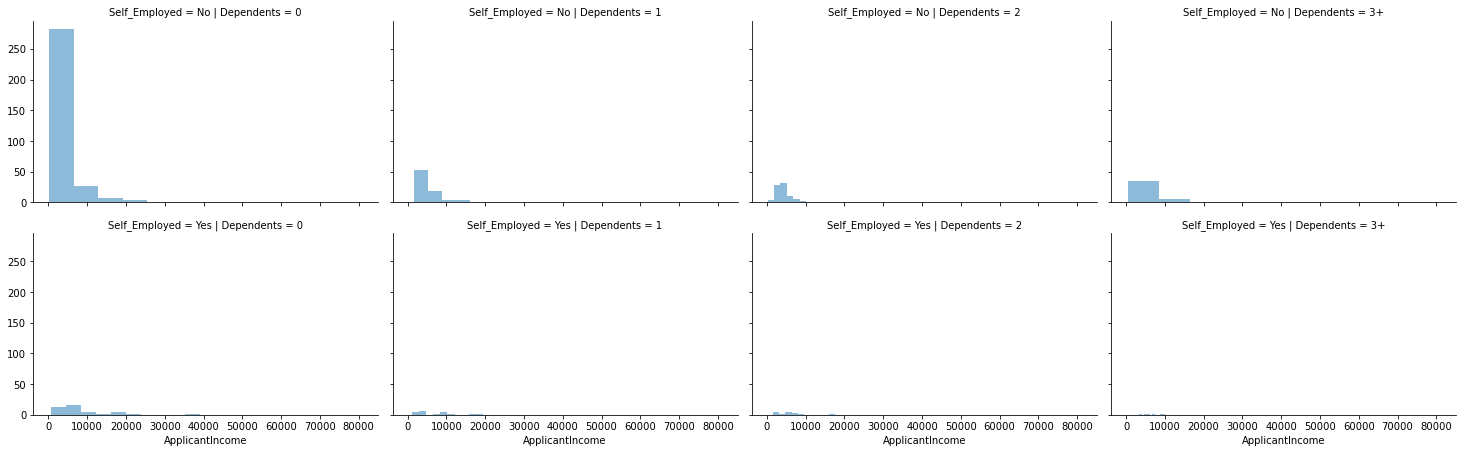

In [21]:
grid=sns.FacetGrid(df_train,row='Self_Employed',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

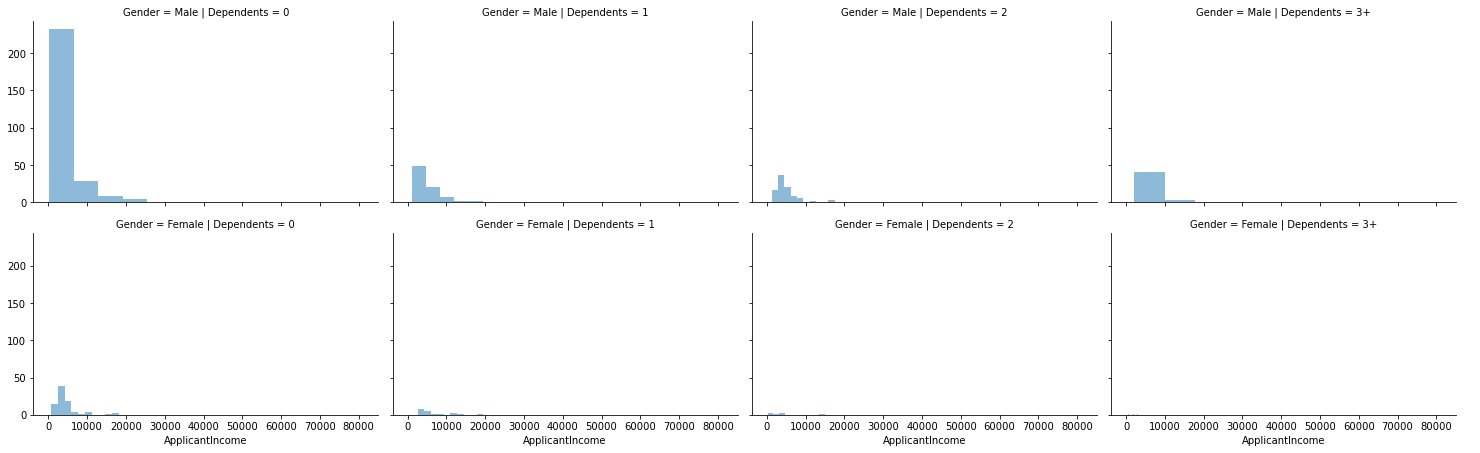

In [22]:
grid=sns.FacetGrid(df_train,row='Gender',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

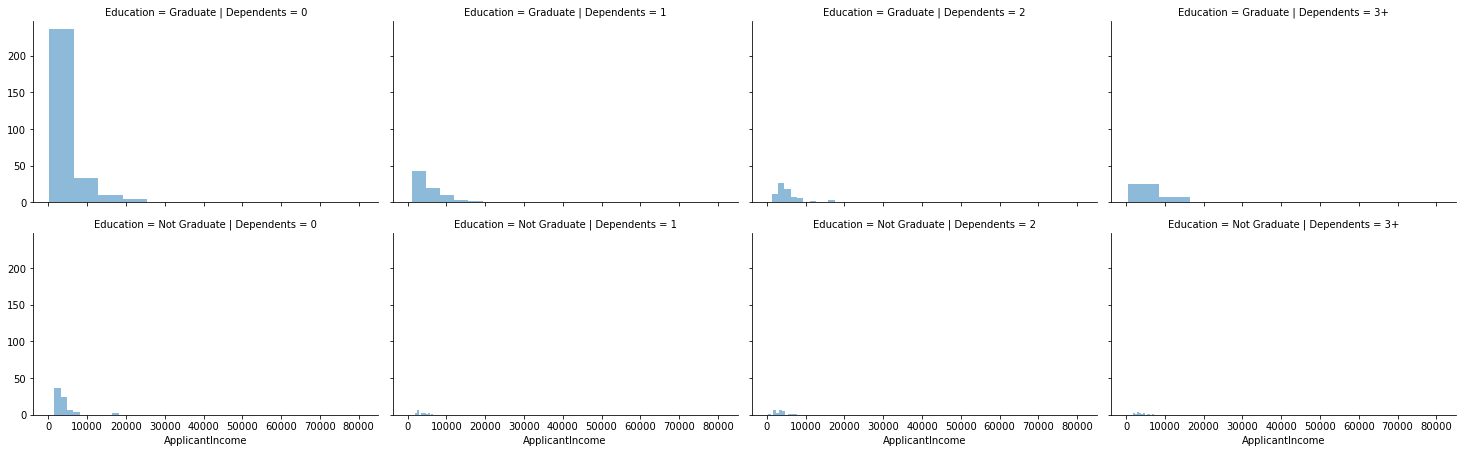

In [23]:
grid=sns.FacetGrid(df_train,row='Education',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

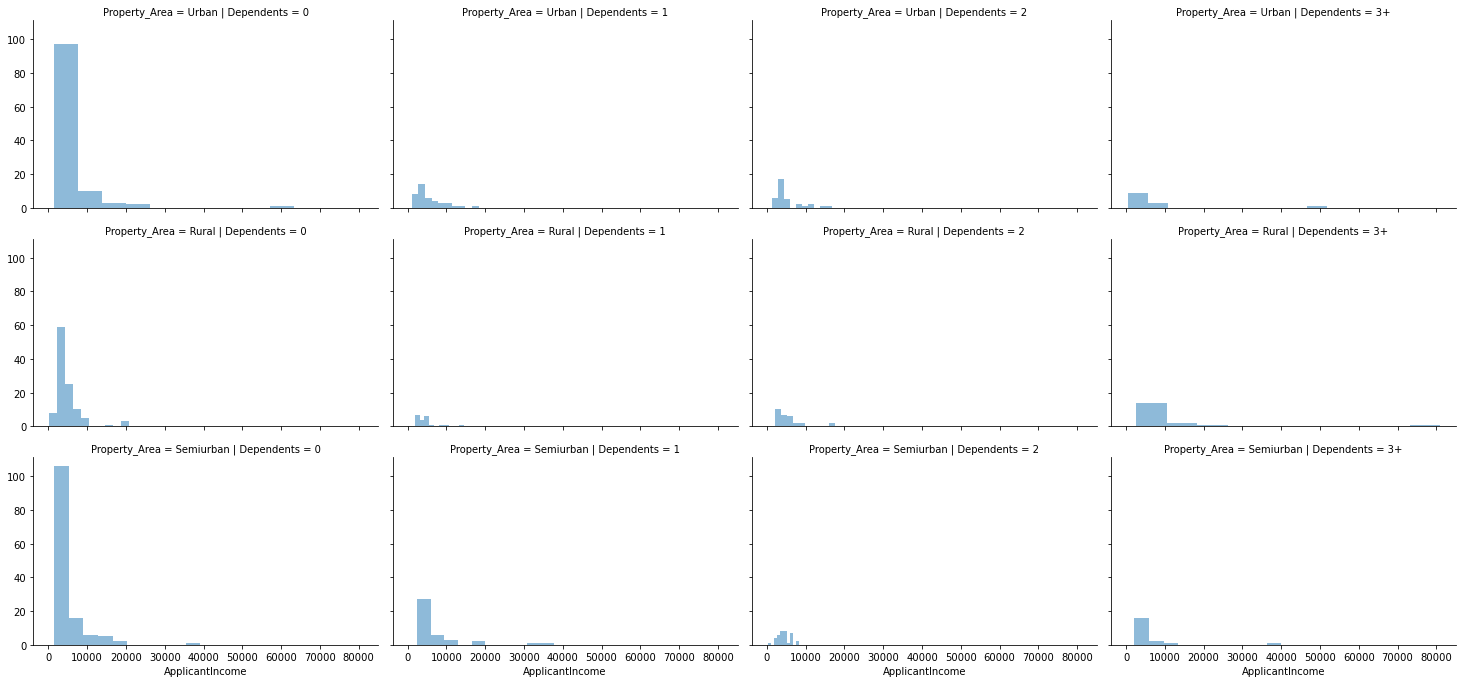

In [24]:
grid=sns.FacetGrid(df_train,row='Property_Area',col='Dependents',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

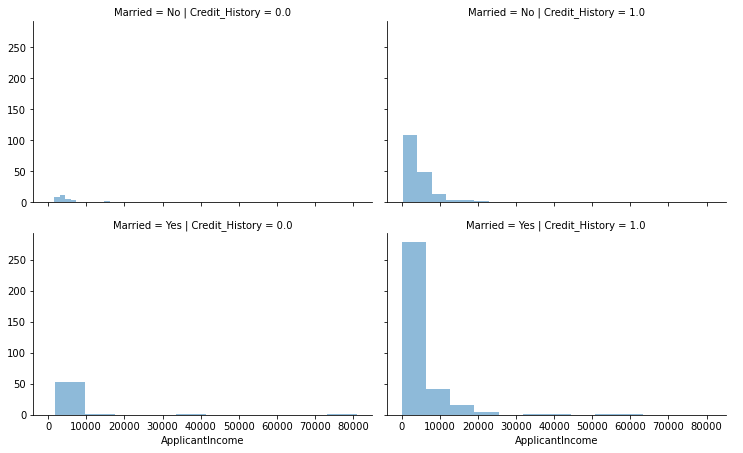

In [25]:
grid=sns.FacetGrid(df_train,row='Married',col='Credit_History',size=3.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

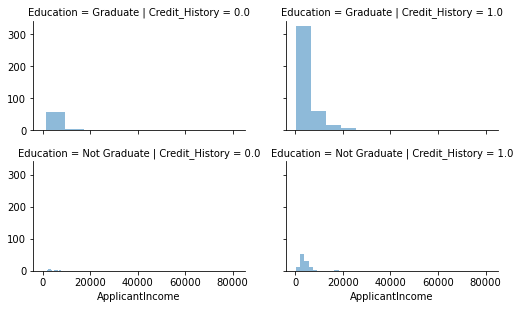

In [26]:
grid=sns.FacetGrid(df_train,row='Education',col='Credit_History',size=2.2,aspect=1.6)
grid.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

In [28]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [29]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [30]:
df_train.drop('Loan_ID', axis = 1, inplace = True)

In [31]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [33]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

In [34]:
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

In [35]:
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


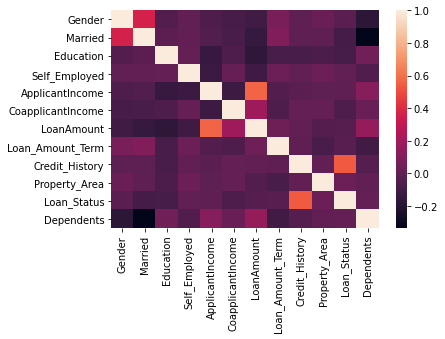

In [37]:
sns.heatmap(df_train.corr())

In [38]:
y = df_train['Loan_Status']
X = df_train[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation


0.8934010152284264

In [42]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [43]:
ypred_tree=tree.predict(X_test)
print(ypred_tree)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [44]:
evaluation = f1_score(y_test, ypred_tree)
evaluation

0.88659793814433

In [45]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
ypred_forest=forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [47]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8820512820512821